Heart failure in prior year                    24
Deep Vein Thrombosis (DVT) in prior year       21
Inflammatory Bowel Disease in prior year       21
Psychotic disorder in prior year               21
Atrial Fibrillation, incident in prior year    20
dtype: int64
In factors_data the highest frequency column (heart failure) is number  14
In data the highest frequency column (heart failure) is number  16
[4, 7, 11, 20, 30, 31, 38, 40, 42, 51, 52, 55, 58, 59, 63, 66, 67, 73, 74, 77, 78, 93, 98, 100]
['30-34', '75-79', '35-39', '55-59', '75-79', '20-24', '60-64', '35-39', '55-59', '55-59', '80-84', '50-54', '25-29', '85-89', '60-64', nan, '65-69', '20-24', nan, '75-79', '80-84', '75-79', '90-94', '80-84']
["['Male']", "['Female']", "['Male']", "['Female']", "['Male']", "['Male']", "['Male', 'Female']", "['Male']", "['Male']", "['Male']", "['Male']", "['Male']", "['Male']", "['Male']", "['Male']", "['Female']", "['Female']", "['Male']", "['Female']", "['Male']", "['Male']", "['Male']", "['Ma

,Age group,Sex
personId,,
4,30-34,['Male']
7,75-79,['Female']
11,35-39,['Male']
20,55-59,['Female']
30,75-79,['Male']
31,20-24,['Male']
38,60-64,"['Male', 'Female']"
40,35-39,['Male']
42,55-59,['Male']


Strongest correlation (factors and predicted risk)    predicted risk of Pulmonary Embolism
Strongest correlation (predicted risk only)           predicted risk of Pulmonary Embolism
Name: Heart failure in prior year, dtype: object

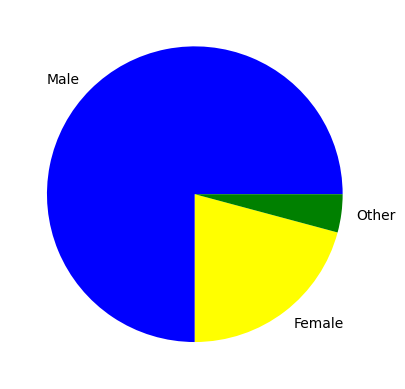

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
import seaborn as sns

factors_data = pd.read_csv('factors_data.csv').set_index('personId')
data = pd.read_csv('data.csv').set_index('personId')
max_corrs = pd.read_csv('max_correlations.csv')
max_corrs = max_corrs.drop('Unnamed: 0', axis=1).set_index('Factor')
#factors_data is just the middle chunk of data, containing 1/0 values for each factor

print(factors_data.sum().nlargest(n=5)) #the most commonly experienced factor is 'heart failure in prior year'
#this will be the focus of these visualisations

print('In factors_data the highest frequency column (heart failure) is number ',factors_data.columns.get_loc('Heart failure in prior year'))
print('In data the highest frequency column (heart failure) is number ',data.columns.get_loc('Heart failure in prior year'))

heart_list = []
for i in range(len(data)):
    if data.iloc[i,16] == 1: heart_list.append(i+1) #+1 as the data frame is 0-indexed, however the index values (personId labels) start from 1
    else: continue
        
print(heart_list) #this is a list of the personId for those who have experienced heart failure in the prior year

heart_ages = []
heart_sexes = []
for i in heart_list:
    heart_ages.append(data.iloc[i-1, 0])
    heart_sexes.append(data.iloc[i-1,1])
    
print(heart_ages)
print(heart_sexes)
heart_failure = pd.DataFrame(data=[heart_list, heart_ages, heart_sexes])
heart_failure = heart_failure.T.rename(columns={0:'personId',1:'Age group',2:'Sex'}).set_index('personId')
ipd.display(heart_failure) #this is the personal information for all participants who experienced heart failure in the prior year
#personId 38 is listed as both male and female. This is the case for several participants, but only one of those who experienced heart failure
#personIds 66 and 74 hold no age data
fig=plt.figure()
heart_failure['Sex'].value_counts()
plt.pie(x=heart_failure['Sex'].value_counts(), labels=['Male','Female','Other'], colors=['blue','yellow','green'])
#of those who experienced heart failure, there is a much higher proportion of males than females 
#personId 38, listed as both male and female has been included as 'other'
heart_failure.to_csv('heart_failure.csv')

max_corrs.loc['Heart failure in prior year'] #Predicted risk of pulmonary embolism has the strongest correlation to heart failure in the prior year

['Female' 'Male' 'Other']
For  Female :        predicted risk of Pulmonary Embolism
count                             34.000000
mean                               0.003080
std                                0.003865
min                                0.000006
25%                                0.000575
50%                                0.002492
75%                                0.003760
max                                0.018683
For  Male :        predicted risk of Pulmonary Embolism
count                             57.000000
mean                               0.004369
std                                0.004896
min                                0.000006
25%                                0.000827
50%                                0.002399
75%                                0.006678
max                                0.021271
For  Other :        predicted risk of Pulmonary Embolism
count                              9.000000
mean                               0.004184
std        

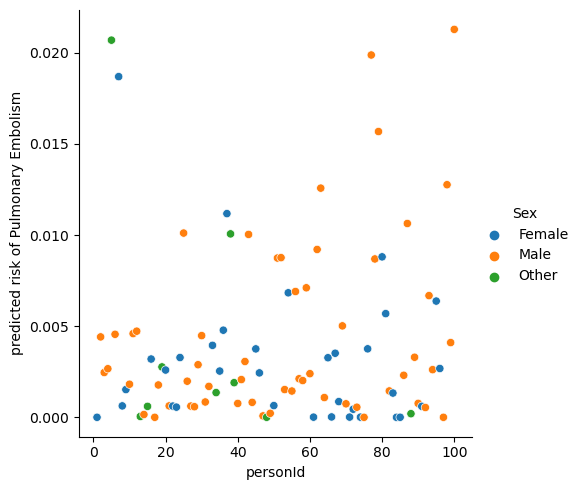

In [127]:
data = data.replace("['Male', 'Female']", 'Other')
data = data.replace("['Female', 'Male']", 'Other')
data = data.replace("['Male']", 'Male')
data = data.replace("['Female']", 'Female')
print(data.Sex.unique())

sns.relplot(data=data, x=data.index, y='predicted risk of Pulmonary Embolism', hue='Sex', kind='scatter')

pulmonary_data = data[['Sex','predicted risk of Pulmonary Embolism']]
for key, frame in pulmonary_data.groupby('Sex'):
    print('For ',key,':',frame.describe())